Importa o modelo a ser fatiado e mapeado

In [16]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
Total de [criando as camadas] : 0.07275390625
salvando as camadas
Total de [salvando as camadas] : 0.05266070365905762
Total de [Fase 0: ] : 0.12561440467834473


Paredes Finas

Fase 1: Camada: 0
Criando paredes finas
OK: fechou contorno
Total de [Criando paredes finas] : 5.754405736923218
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.022230863571166992
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.2169780731201172
Total de [Fase 1: Camada: 0] : 6.006329536437988


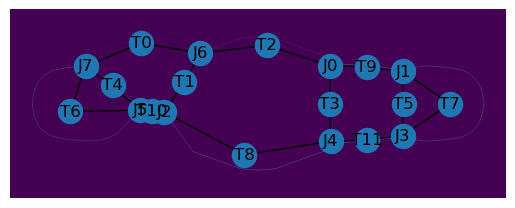

In [17]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
configuracoes = files.Config("solda_config.yaml")
[d_tw, sob_tw_per, name_prog] = gui.ask_parameters_thin_walls(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_tw, sob_tw_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Contornos

In [18]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[void_max,external_max,internal_max,d_cont,sob_cont_per,name_prog] = gui.ask_parameters_offsets(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max, d_cont, sob_cont_per, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 9
Total de [Criando Lvls] : 2.6754214763641357
Criando os loops
Total de [Criando os loops] : 1.4993133544921875
Criando regiões de influência
Total de [Criando regiões de influência] : 0.16550993919372559
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 2.400886058807373
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:279 maior void:0.0732519422863485Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:17 maior void:0.018867924528301886Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:59232 maior void:42.1953385127636Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 2] Perdendo total:17 maior void:0.018867924528301886Bw -> aceito
['Lvl_000', 1, 2] Perdendo total:0 maior void:0Bw ->

Pontes

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 13.827860593795776
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Fechou uma ponte OK
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 13.326563358306885
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_003') Maior prioridade: 0
Elemento: ('Reg_001', 'Reg_002') Maior prioridade: 1
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 2
Total de [Criando pontes de Crossover] : 0.07443046569824219
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.026258468627929688
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0014421939849853516
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.5164716243743896
Total de [Fase 3: Camada: 0] : 27.836151838302612


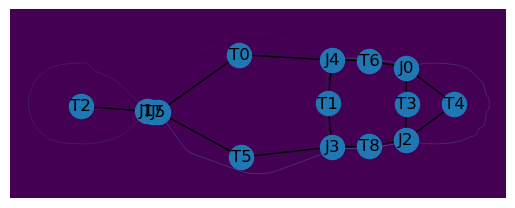

In [19]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[n_max, d_bridg, sob_bridg_per, name_prog] = gui.ask_parameters_bridges(configuracoes)
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_bridg, sob_bridg_per, len(camadas), sum_prohibited_areas, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Zigzags

In [20]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[d_larg, sob_larg_per, name_prog] = gui.ask_parameters_zigzags(configuracoes)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders, d_larg, sob_larg_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.9485435485839844
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.07082176208496094
Total de [Fase 4: Camada: 0] : 2.348597764968872


IMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.8787021636962891


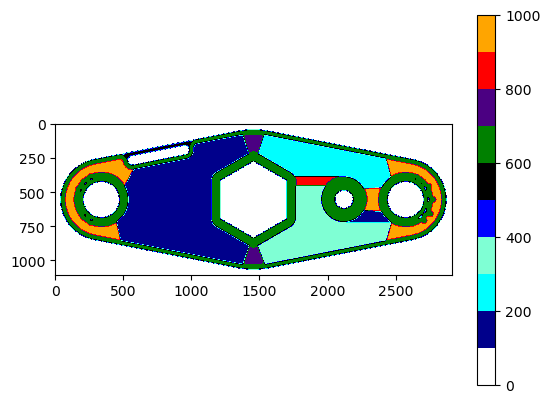

In [21]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [22]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.14956045150756836
Total de [Making offset routes] : 3.9620776176452637


Rotas de pontes

In [23]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.05762529373168945
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 4.021312952041626
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 7.010478734970093
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.29071760177612305
Total de [Camada: L_000] : 12.008950233459473
Total de [Making bridges routes] : 12.0120530128479


Rotas de Ziguezague

In [24]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 8.75746774673462
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.13120770454406738
fazendo as tres opções:
Total de [fazendo as tres opções:] : 8.61797308921814
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.12965774536132812
fazendo as tres opções:
Total de [fazendo as tres opções:] : 7.329597473144531
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.12949228286743164
fazendo as tres opções:
Total de [fazendo as tres opções:] : 0.023962736129760742
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.04276847839355469
Total de [criando as rotas de zigzag, camada:L_000] : 26.41256594657898
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.18063092231750488
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.16682100296020508
Conectando regiões de zi

WEAVING

In [25]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 1.1598114967346191
Achando os contatos
Total de [Achando os contatos] : 16.91515040397644
criando os weavings
sequncia corrigida, b e c trocado
sequncia corrigida, b e c trocado
Total de [criando os weavings] : 8.386828422546387
Total de [gerando preenchimentos oscilatórios] : 28.80869150161743
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.19066882133483887
Total de [Fase 5 b] : 28.99983525276184


Rotas de Thin Walls

In [26]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.2738938331604004
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.030269145965576172
Total de [Making thin walls routes] : 0.3044853210449219
Total de [Fase 5] : 0.3045642375946045


Encontrando o lugar onde será o começo da trilha de cada ilha

In [27]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001096487045288086
Total de [Encontrando ponto de união ext-int] : 0.17977237701416016


Unificando rotas EXTERNAS nas camadas

In [28]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 6: layer_{c.name}"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6: layer_L_000
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 1.9531855583190918
Conectando pontes de Crossover
salto:  [717, 2493]
salto:  [447, 488]
salto:  [498, 2262]
Total de [Conectando pontes de Crossover] : 1.265005111694336
Total de [Conectando rotas externas] : 4.210172414779663
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.13205957412719727
Total de [Fase 6: layer_L_000] : 4.34252667427063


Unificando rotas INTERNAS nas camadas

In [29]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 7: Layer_{c.name}"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7: Layer_L_000
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 4.933226585388184
Conectando pontes de zigzag
salto:  [195, 1509]
salto:  [1005, 1539]
Total de [Conectando pontes de zigzag] : 0.5372779369354248
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.14113378524780273
Total de [Fase 7: Layer_L_000] : 6.598109483718872


Unindo rotas de thin walls

In [30]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 8: Layer_{c.name}"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8: Layer_L_000
Convertendo paredes finas
Total de [Convertendo paredes finas] : 1.1464486122131348
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09777474403381348
Total de [Fase 8: Layer_L_000] : 1.412954330444336


Unindo todas as rotas

In [31]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.04121732711791992
Conectando todas as partes
Total de [Conectando todas as partes] : 0.024171113967895508
salvando imagens das rotas
[[1049, 1494], [1047, 1514], [1046, 1515], [1046, 1523], [1045, 1524], [1045, 1531], [1044, 1532], [1044, 1539], [1043, 1540], [1043, 1547], [1042, 1548], [1042, 1558], [1041, 1559], [1041, 1563], [1040, 1564], [1040, 1568], [1039, 1569], [1039, 1573], [1038, 1574], [1038, 1578], [1037, 1579], [1037, 1583], [1036, 1584], [1036, 1588], [1035, 1589], [1035, 1593], [1033, 1599], [1033, 1604], [1032, 1605], [1032, 1609], [1031, 1610], [1031, 1614], [1030, 1615], [1030, 1619], [1029, 1620], [1029, 1624], [1028, 1625], [1028, 1629], [1027, 1630], [1027, 1634], [1026, 1635], [1026, 1639], [1024, 1645], [1024, 1650], [1023, 1651], [1023, 1655], [1022, 1656], [1022, 1660], [1021, 1661], [1021, 1665], [1020, 1666], [1020, 1670], [1019, 1671], [1019, 1675], [1018, 1676], [1018, 1680

Gerando o Código G

In [1]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_vazio, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()
configuracoes = files.Config("solda_config.yaml")

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [1+8+2+(i*2) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               configuracoes,
                               vel_vazio,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[1049, 1494], [1047, 1514], [1046, 1515], [1046, 1523], [1045, 1524], [1045, 1531], [1044, 1532], [1044, 1539], [1043, 1540], [1043, 1547], [1042, 1548], [1042, 1558], [1041, 1559], [1041, 1563], [1040, 1564], [1040, 1568], [1039, 1569], [1039, 1573], [1038, 1574], [1038, 1578], [1037, 1579], [1037, 1583], [1036, 1584], [1036, 1588], [1035, 1589], [1035, 1593], [1033, 1599], [1033, 1604], [1032, 1605], [1032, 1609], [1031, 1610], [1031, 1614], [1030, 1615], [1030, 1619], [1029, 1620], [1029, 1624], [1028, 1625], [1028, 1629], [1027, 1630], [1027, 1634], [1026, 1635], [1026, 1639], [1024, 1645], [1024, 1650], [1023, 1651], [1023, 1655], [1022, 1656], [1022, 1660], [1021, 1661], [1021, 1665], [1020, 1666], [1020, 1670], [1019, 1671], [1019, 1675], [1018, 1676], [1018, 1680], [1017, 1681], [1017, 1685], [1015, 1691], [1015, 1696], [1014, 1697], [1014, 1701], [1013, 1702], [1013, 1706], [1012, 1707], [1012, 1711], [1011, 1712], [1011, 1716], [1010, 1717]

In [6]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [7]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [8]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [9]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [10]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)